In [1]:
# suppress warninigs

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Import required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

Step - 1: Reading, understanding and visualising of data


1.1. Reading and understanding of data

In [4]:
# Reading data set

bikesharing = pd.read_csv("day.csv")
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# shape of the dataframe

bikesharing.shape

(730, 16)

In [6]:
# Getting column information of dataframe

bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# check of any duplicates

bikesharing.duplicated().sum()

0

Insights:

1. Instant column is record index column doesn't have any significance in our analysis. So we will drop the column
2. The variables casual and registered are summmed up to get cnt variable which is our target variable. During prediction
   we don't need these data, so we will drop these two variables
3. We are going to use weekday variable which is derived from dteday, so we will not be using dteday and will drop it.
4. temp and atemp is directly correlated among each other. We will use temp and drop atemp

In [9]:
# drop columns instant, casual, registered, dteday, atemp

bikesharing.drop(['instant', 'dteday', 'atemp', 'casual', 'registered'], axis = 1, inplace=True)

In [10]:
# After droppping the variables checking the columns abnd rows in the dataframe

bikesharing.shape

(730, 11)

In [11]:
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [12]:
# Identify categorical variables

cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Identify numeric variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

In [13]:
# Convert data type of categorical variables

bikesharing[cat_vars] = bikesharing[cat_vars].astype('category')
bikesharing.describe()

,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


In [14]:
# Get information of categorical variables

bikesharing.describe(include = ['category'])

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,3,0,1,0,0,1,1
freq,188,365,62,709,105,499,463


Data Disctionary:
 * season column is having four seasons as (1:spring, 2:summer, 3:fall, 4:winter)
 * mnth column is having 12 categorical values denoting for months Jan to Dec
 * weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 * weekday column having 7 varibles ( 0 to 6 ) denoting (0: Sun, 1: Mon 2: Tue, 3: Wed, 4: Thu, 5: Fri, 6: Sat)

 * yr, holiday, workingday are having binary values. So we will not map these columns

In [16]:
# mapped season column according to description
bikesharing['season'] = bikesharing['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# mapped the weekday column according to description
bikesharing['weekday'] = bikesharing['weekday'].map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

# mapped the mnth column according to description
bikesharing['mnth'] = bikesharing['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug',
                                               9: 'sep', 10: 'oct', 11: 'nov', 12:'dec'})

# mapped the weathersit column
bikesharing['weathersit'] = bikesharing['weathersit'].map({1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
                                                           2: 'Mist_Cloudy, Mist_Broken_clouds, Mist_Few_clouds, Mist',
                                                           3: 'Light_Snow, Light_Rain_Thunderstorm_Scattered clouds, Light_Rain_Scattered_clouds',
                                                           4: 'Heavy_Rain_Ice_Pallets_Thunderstorm_Mist, Snow_Fog'})

In [17]:
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,Sat,0,"Mist_Cloudy, Mist_Broken_clouds, Mist_Few_clou...",14.110847,80.5833,10.749882,985
1,spring,0,jan,0,Sun,0,"Mist_Cloudy, Mist_Broken_clouds, Mist_Few_clou...",14.902598,69.6087,16.652113,801
2,spring,0,jan,0,Mon,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,Tue,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,Wed,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",9.305237,43.6957,12.522300,1600


Step 2 - Data Visualisation

In [19]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 29.4 KB


2.1 Univariate Analysis

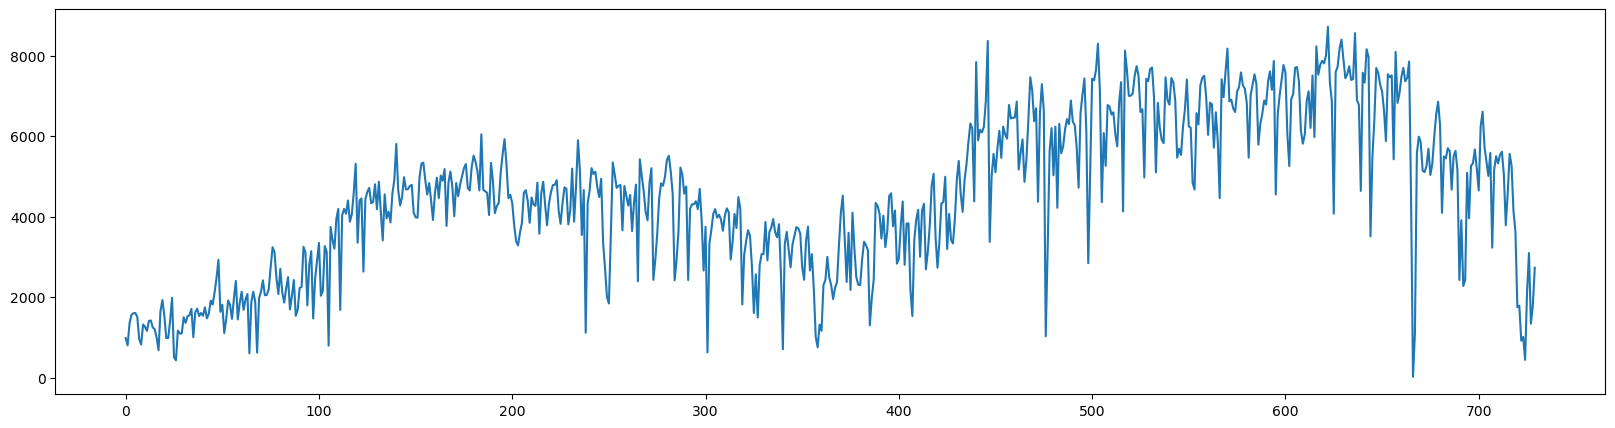

In [21]:
# Visualise the pattern of demand (target variable - 'cnt') over period of 2 years

plt.figure(figsize = (20,5))
plt.plot(bikesharing.cnt)
plt.show()

Insights:

We can observe that there was growth over the period and recently we could see there is reduction in demand

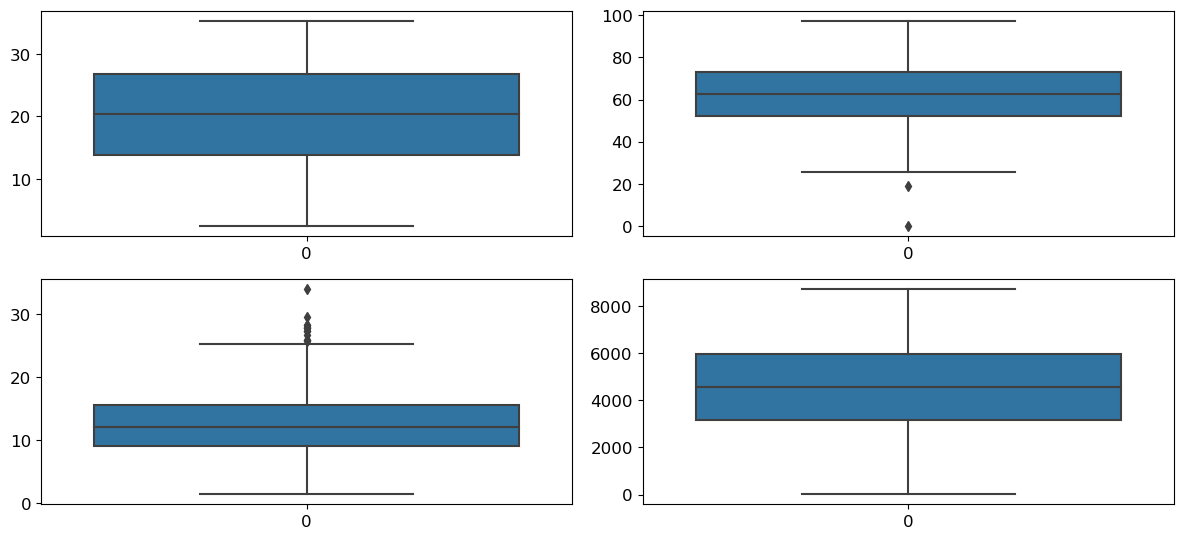

In [23]:
# Visualising numerical varibles

# selecting numerical variables
num_var = bikesharing.select_dtypes(exclude = 'category').columns

# Box plot
col = 2
row = len(num_var) // col+1

plt.figure(figsize=(12,8))
plt.rc('font', size=12)
for i in list(enumerate(num_var)):
    plt.subplot(row, col, i[0]+1)
    sns.boxplot(bikesharing[i[1]])
plt.tight_layout()   
plt.show()

Insights:

From the above plots it could be observed that hum and windspeed are having few outliers.

In [25]:
# get percentage outlier for hum and windspeed

# function to get outlier percentage
def percentage_outlier(x):
    iqr = bikesharing[x].quantile(0.75) - bikesharing[x].quantile(0.25)
    HL = bikesharing[x].quantile(0.75) + iqr*1.5
    LL = bikesharing[x].quantile(0.25) - iqr*1.5
    per_outlier = ((bikesharing[x]< LL).sum() + (bikesharing[x]>HL).sum())/len(bikesharing[x])*100
    per_outlier = round(per_outlier,2)
    return(per_outlier)

print('Percentage of outlier (hum): ', percentage_outlier('hum'))
print('Percentage of outlier (windspeed): ', percentage_outlier('windspeed'))

Percentage of outlier (hum):  0.27
Percentage of outlier (windspeed):  1.78


Insights:

Percentage of outlier for hum and windspeed are 0.27 and 1.78 respectively.
As these percentage is low, and we can see there is no significant abnormal outlier value. So we will leave it as it is.

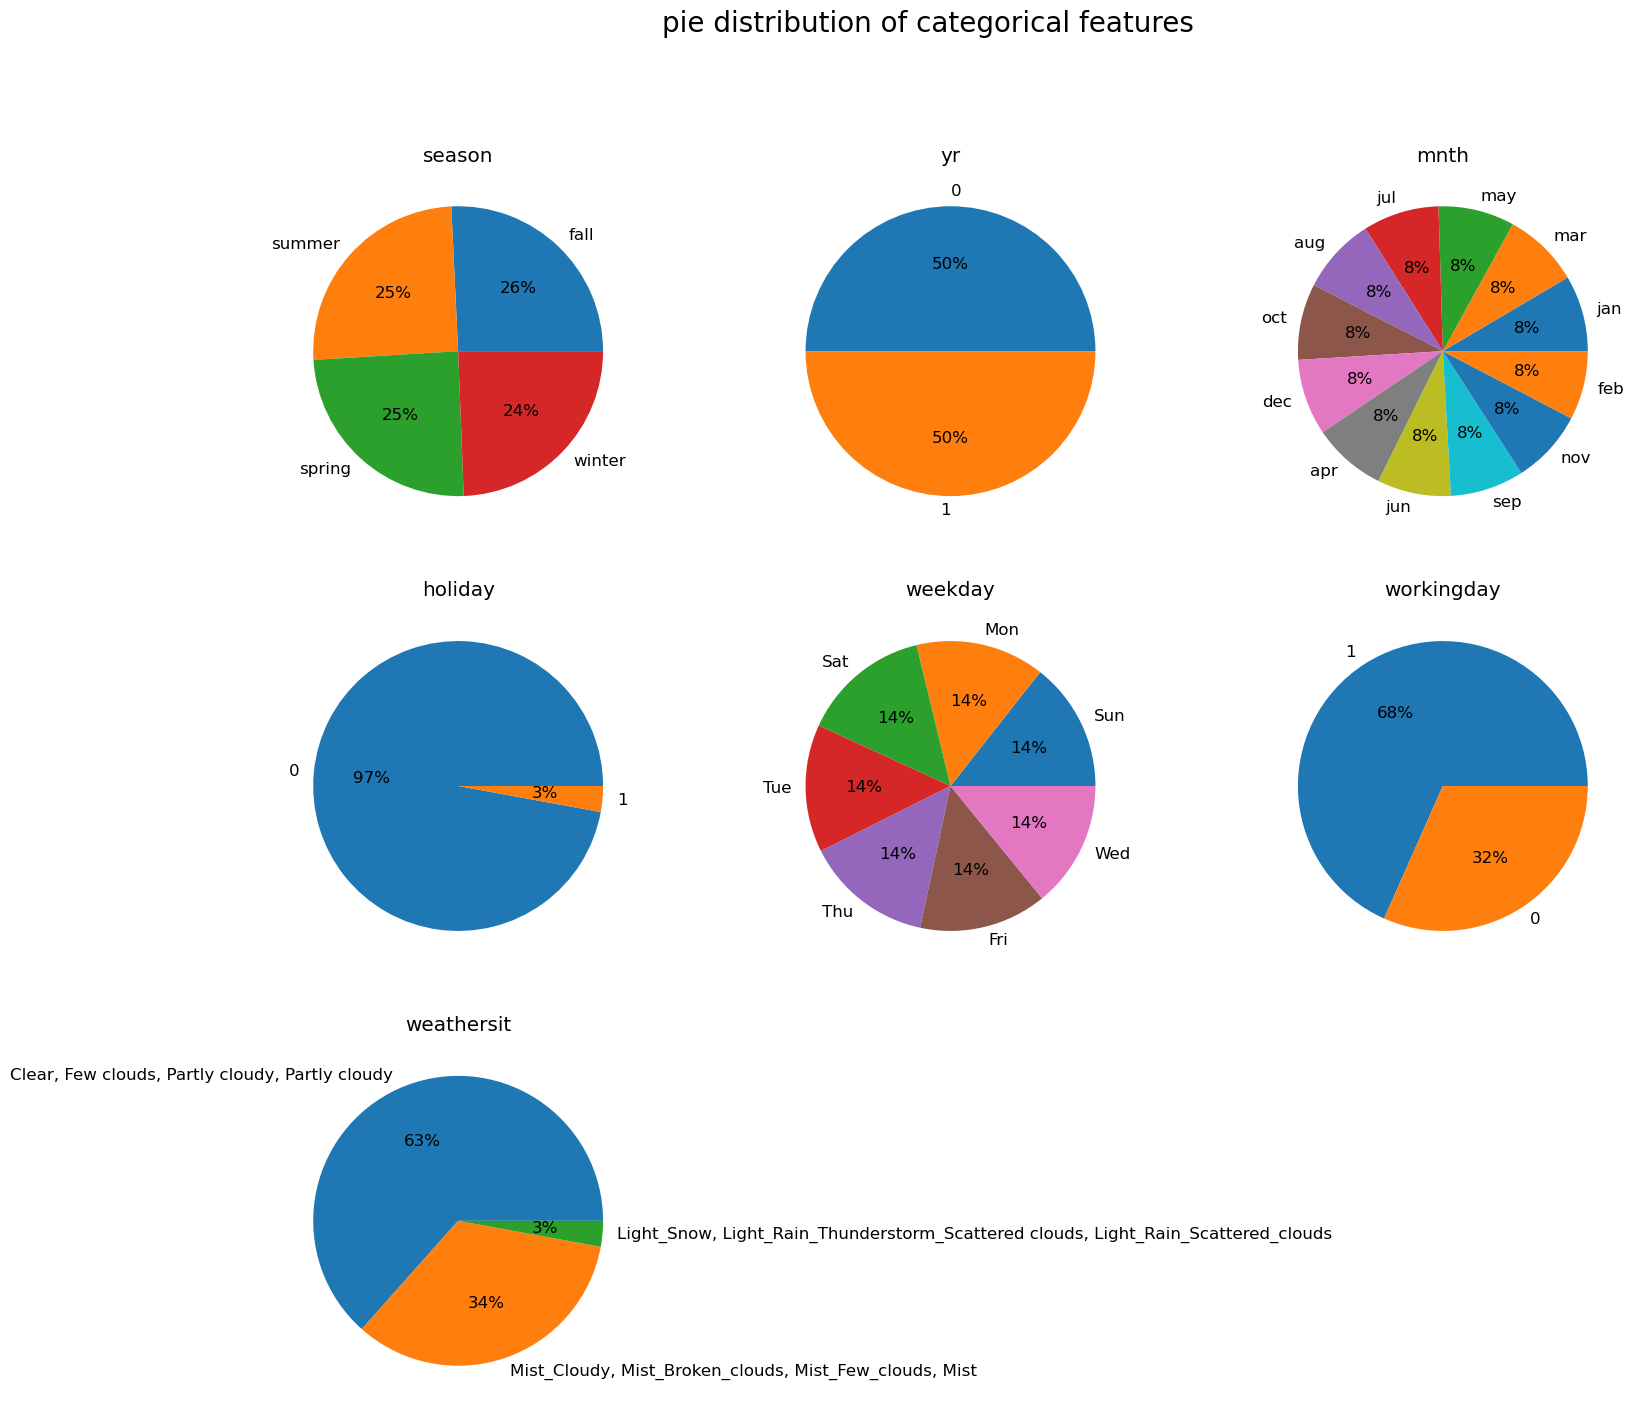

In [27]:
# # # Visulalising Categorical Variables using pie chart

df_piplot = bikesharing.select_dtypes(include='category')

plt.figure(figsize=(18,16))
plt.suptitle('pie distribution of categorical features', fontsize=20)
for i in range(1,df_piplot.shape[1] + 1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(df_piplot.columns.values[i-1])
    values=df_piplot.iloc[:,i-1].value_counts(normalize=True).values
    index=df_piplot.iloc[:,i-1].value_counts(normalize=True).index
    plt.pie(values,labels=index,autopct='%1.0f%%')
# plt.tight_layout(pad = 0.5)
plt.show()

In [28]:
bikesharing.weathersit.value_counts()

Clear, Few clouds, Partly cloudy, Partly cloudy                                      463
Mist_Cloudy, Mist_Broken_clouds, Mist_Few_clouds, Mist                               246
Light_Snow, Light_Rain_Thunderstorm_Scattered clouds, Light_Rain_Scattered_clouds     21
Name: weathersit, dtype: int64

Insights:

* Seasons: We could see business was operating similar days in all four seasons.
* Yr: Number of days operation in both the year are almost same.
* Month: We could see business was operating similar days in all 12 months.
* Holiday: Business was operating in 3% days of holiday
* weekdays: We could see business was operating similar percentage in all weekdays.
* Workingday: Bisuness was operating in 68% in workign days and 32% in nonworking days.
* Weathersit: From the above analaysis it is being observed that there is no data for 4th category of weathersit i.e Heavy Rain + Ice *   Pallets + Thunderstorm + Mist, Snow + Fog.May be the company is not operating on those days or there was no demand of bike.

2.2 Bi-Variate analysis

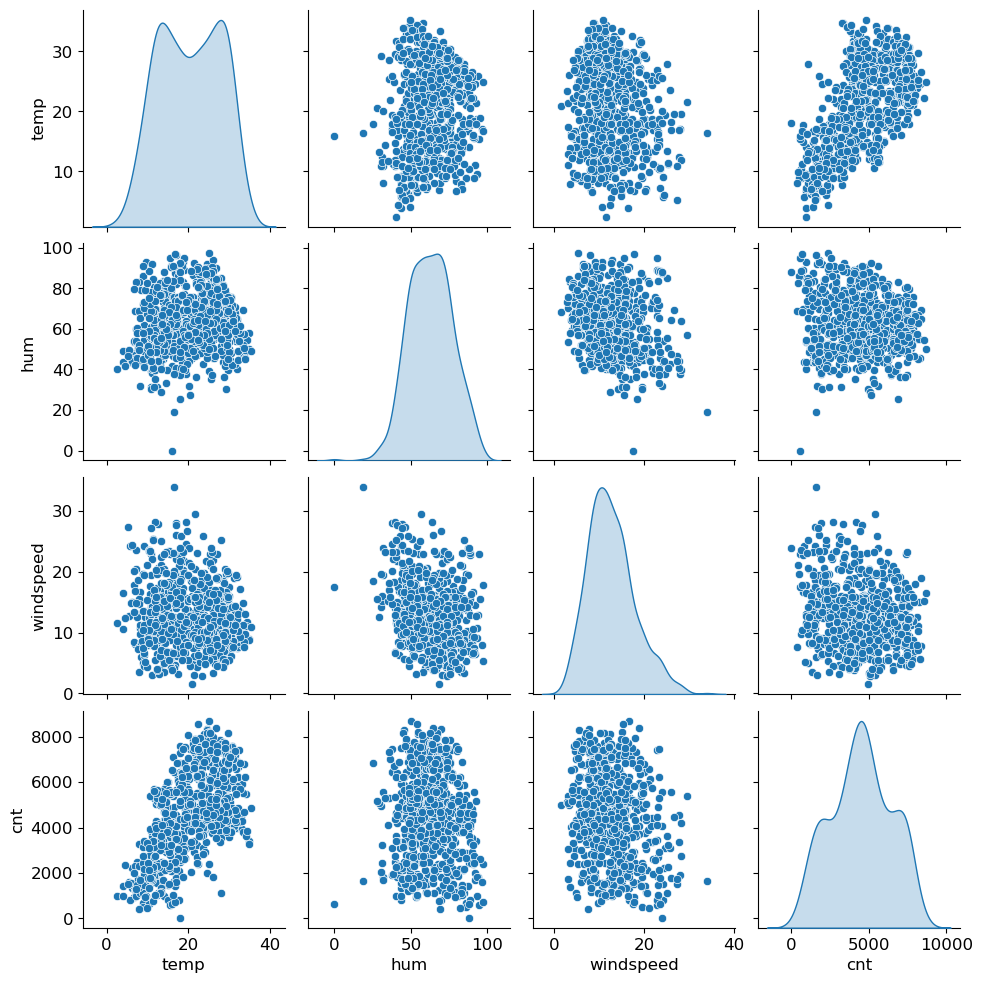

In [31]:
# pairplot for continuous data type
sns.pairplot(bikesharing.select_dtypes(['int64','float64']), diag_kind='kde')
plt.show()

Insights:
From the above pairplot we could observe that, temp has highest positive correlation with target variable cnt.

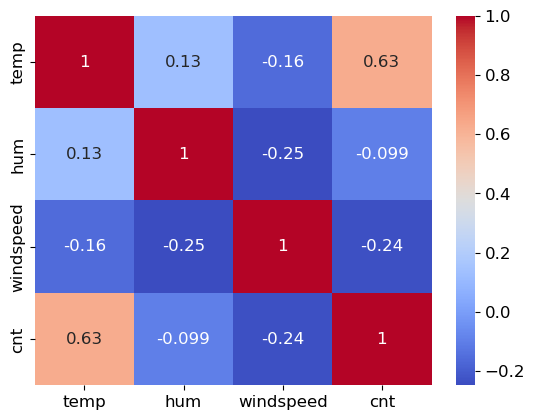

In [33]:
# look at the correaltion between continous varibales using heat map
sns.heatmap(bikesharing.corr(), annot=True, cmap='coolwarm')
plt.show()

We could infer follwing observation:

A positive correalation observed between cnt and temp (0.63)
A Negative correlation observed for cnt with hum and windspeed (-0.099 and -0.24)

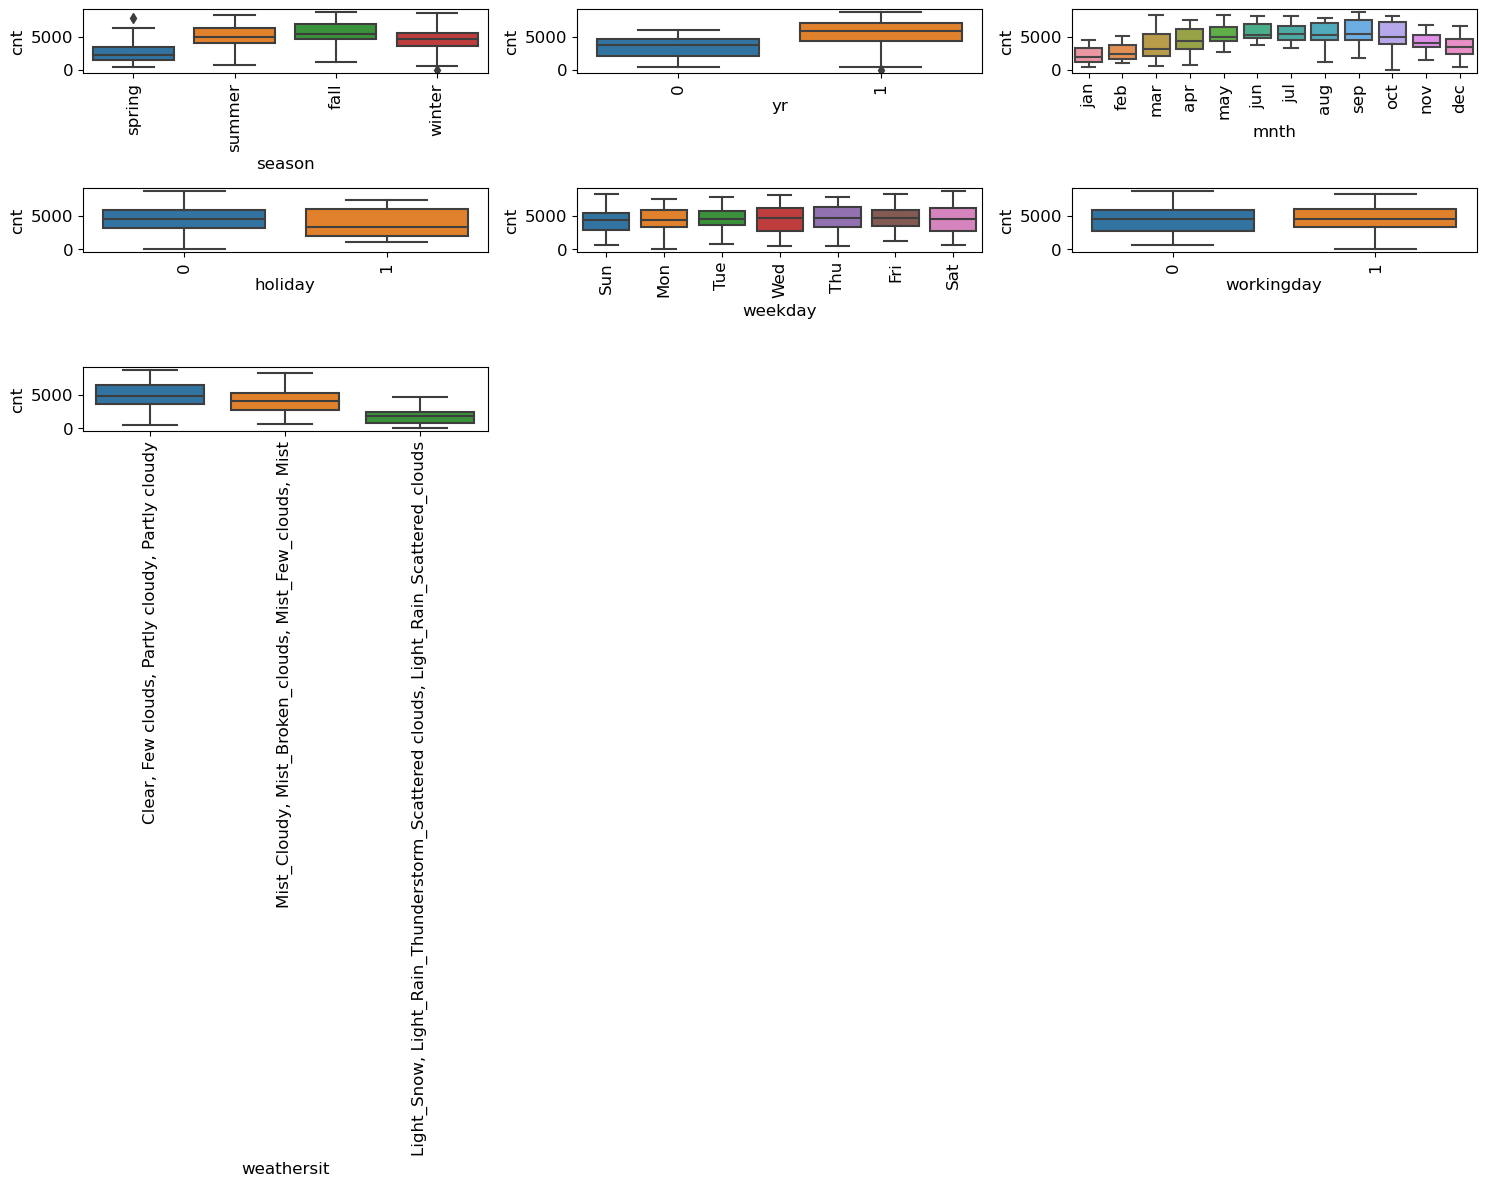

In [35]:
# Box plot for categorical variables
cat_vars = bikesharing.select_dtypes(include = 'category').columns

col = 3
row = len(cat_vars)//col+1

plt.figure(figsize=(15,12))
for i in list(enumerate(cat_vars)):
    plt.subplot(row,col,i[0]+1)
    sns.boxplot(x = i[1], y = 'cnt', data = bikesharing)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1)    
plt.show()

Insights:
Q. From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

Answer:

* The demad of bike is less in the month of spring when compared with other seasons
* The demand bike increased in the year 2019 when compared with year 2018.
* Month Jun to Sep is the period when bike demand is high. The Month Jan is the lowest demand month.
* Bike demand is less in holidays in comparison to not being holiday.
* The demand of bike is almost similar throughout the weekdays.
* There is no significant change in bike demand with workign day and non working day.
* The bike demand is high when weather is (Clear, Few clouds, Partly cloudy, Partly cloudy) however demand is less in case of (Light_Snow, Light_Rain_Thunderstorm_Scattered clouds, Light_Rain_Scattered_clouds). We do not have any demand for (Heavy Rain + Ice * Pallets + Thunderstorm + Mist, Snow + Fog) , so we can not derive any conclusion. May be the company is not operating on those days or there is no demand of bike.

Step - 3. Data Preparation

3.1 Creating of dummy variables

In [38]:
# get dummy variables for season, weekday, mnth and weathersit

dummy_vars = pd.get_dummies(bikesharing[['season','weekday','mnth','weathersit']],drop_first=True)

# concat the dummy df with original df
bikesharing = pd.concat([bikesharing, dummy_vars], axis = 1)

# drop season column
bikesharing.drop(['season','weekday','mnth','weathersit'], axis=1, inplace=True)

bikesharing.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,"weathersit_Mist_Cloudy, Mist_Broken_clouds, Mist_Few_clouds, Mist","weathersit_Light_Snow, Light_Rain_Thunderstorm_Scattered clouds, Light_Rain_Scattered_clouds"
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
bikesharing.shape

(730, 29)

In [40]:
# Check dataframe
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                                                                                        Non-Null Count  Dtype   
---  ------                                                                                        --------------  -----   
 0   yr                                                                                            730 non-null    category
 1   holiday                                                                                       730 non-null    category
 2   workingday                                                                                    730 non-null    category
 3   temp                                                                                          730 non-null    float64 
 4   hum                                                                                           730 non-null    float64 
 5   windspeed             

In [41]:
# Convert categorical columns to numeric 
bikesharing[['yr','holiday','workingday']]= bikesharing[['yr','holiday','workingday']].astype('uint8')
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   yr                                                                                            730 non-null    uint8  
 1   holiday                                                                                       730 non-null    uint8  
 2   workingday                                                                                    730 non-null    uint8  
 3   temp                                                                                          730 non-null    float64
 4   hum                                                                                           730 non-null    float64
 5   windspeed                    

3.2 Splitting data into test and train set

In [43]:
# Split train test dataset

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bikesharing, train_size = 0.7, random_state = 10)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### 3.3 Scaling of data set

During EDA we could observe that there is different range of data in the data set. So it becomes important to scale the data.
Here we will be using Min-Max scaling (normalisation) to scale both training and tesing dataset.



#### Training Data scaling

In [46]:
# Scaling od train set

from sklearn.preprocessing import MinMaxScaler

# instantiate an object

scaler = MinMaxScaler()
# fit and transform on training data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,"weathersit_Mist_Cloudy, Mist_Broken_clouds, Mist_Few_clouds, Mist","weathersit_Light_Snow, Light_Rain_Thunderstorm_Scattered clouds, Light_Rain_Scattered_clouds"
72,0,0,1,0.298094,0.393891,0.236118,0.194978,0,0,0,...,0,0,0,0,0,0,0,0,0,0
510,1,0,0,0.778657,0.694105,0.364071,0.737052,1,0,0,...,1,0,0,0,0,0,0,0,0,0
700,1,0,0,0.327249,0.809877,0.210252,0.509236,0,0,1,...,0,0,0,0,0,0,0,1,1,0
264,0,0,1,0.694699,0.910249,0.217975,0.526862,0,1,0,...,0,0,0,0,1,0,0,0,1,0
577,1,0,1,0.811368,0.624004,0.244886,0.863093,0,1,0,...,0,0,0,1,0,0,0,0,0,0




#### Testing Data scaling

In [48]:
# check test dataset before scaling
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,"weathersit_Mist_Cloudy, Mist_Broken_clouds, Mist_Few_clouds, Mist","weathersit_Light_Snow, Light_Rain_Thunderstorm_Scattered clouds, Light_Rain_Scattered_clouds"
566,1,0,0,24.429153,86.5417,14.291100,4459,0,1,0,...,0,0,1,0,0,0,0,0,0,1
374,1,0,1,12.656536,64.6522,12.565984,3598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,0,0,1,29.622500,39.6250,6.874736,5362,0,1,0,...,0,0,1,0,0,0,0,0,0,0
529,1,0,1,26.581653,56.9583,17.000111,7363,1,0,0,...,0,1,0,0,0,0,0,0,0,0
233,0,0,1,28.358347,47.0000,18.542250,4758,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,"weathersit_Mist_Cloudy, Mist_Broken_clouds, Mist_Few_clouds, Mist","weathersit_Light_Snow, Light_Rain_Thunderstorm_Scattered clouds, Light_Rain_Scattered_clouds"
566,1,0,0,0.652175,0.863516,0.393568,0.486297,0,1,0,...,0,0,1,0,0,0,0,0,0,1
374,1,0,1,0.276477,0.584521,0.340487,0.382349,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,0,0,1,0.817910,0.265533,0.165370,0.595316,0,1,0,...,0,0,1,0,0,0,0,0,0,0
529,1,0,1,0.720868,0.486457,0.476922,0.836895,1,0,0,...,0,1,0,0,0,0,0,0,0,0
233,0,0,1,0.777567,0.359532,0.524373,0.522395,0,1,0,...,0,0,0,1,0,0,0,0,0,0





### 3.4 Split data set into X and y sets (for both train and test set)

In [51]:
# Creating X and y dataframe from train set

y_train = df_train.pop('cnt')
X_train = df_train
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,weekday_Mon,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,"weathersit_Mist_Cloudy, Mist_Broken_clouds, Mist_Few_clouds, Mist","weathersit_Light_Snow, Light_Rain_Thunderstorm_Scattered clouds, Light_Rain_Scattered_clouds"
72,0,0,1,0.298094,0.393891,0.236118,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
510,1,0,0,0.778657,0.694105,0.364071,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
700,1,0,0,0.327249,0.809877,0.210252,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
264,0,0,1,0.694699,0.910249,0.217975,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
577,1,0,1,0.811368,0.624004,0.244886,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
# Creating X and y dataframe from train set

y_test = df_test.pop('cnt')
X_test = df_test
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,weekday_Mon,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,"weathersit_Mist_Cloudy, Mist_Broken_clouds, Mist_Few_clouds, Mist","weathersit_Light_Snow, Light_Rain_Thunderstorm_Scattered clouds, Light_Rain_Scattered_clouds"
72,0,0,1,0.298094,0.393891,0.236118,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
510,1,0,0,0.778657,0.694105,0.364071,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
700,1,0,0,0.327249,0.809877,0.210252,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
264,0,0,1,0.694699,0.910249,0.217975,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
577,1,0,1,0.811368,0.624004,0.244886,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0




## Step - 4. Data Modeling and Evaluation




### 4.1. Recursive feature elemination (RFE)

In [55]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_fall', 'season_winter', 'weekday_Mon',
       'weekday_Tue', 'weekday_Wed', 'weekday_Thu', 'weekday_Fri',
       'weekday_Sat', 'mnth_feb', 'mnth_mar', 'mnth_apr', 'mnth_may',
       'mnth_jun', 'mnth_jul', 'mnth_aug', 'mnth_sep', 'mnth_oct', 'mnth_nov',
       'mnth_dec',
       'weathersit_Mist_Cloudy, Mist_Broken_clouds, Mist_Few_clouds, Mist',
       'weathersit_Light_Snow, Light_Rain_Thunderstorm_Scattered clouds, Light_Rain_Scattered_clouds'],
      dtype='object')

In [56]:
# Importing libraries which helps in data modeling ane evaluation

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm

In [57]:
# Running RFE to select 15 members of variables

# create object
lm = LinearRegression()

# fit model
lm.fit(X_train, y_train)

# run RFE
rfe = RFE(lm, n_features_to_select = 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

# Select columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_fall',
       'season_winter', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun',
       'mnth_aug', 'mnth_sep', 'mnth_oct',
       'weathersit_Light_Snow, Light_Rain_Thunderstorm_Scattered clouds, Light_Rain_Scattered_clouds'],
      dtype='object')




### 4.2 Building model using statsmodel, for the detailed statistics

In [59]:
# Creating X_train_rfe with RFE selected variables

X_train_rfe = X_train[col]

In [60]:
# create function for stats linear model

def sm_linear_model(X_train_sm):
    # Add constant
    X_train_sm = sm.add_constant(X_train_sm)
    # Create a fitted model (1st model)
    lm = sm.OLS(y_train, X_train_sm).fit()
    return lm

In [61]:
# Function to calculate VIF
# Calculate VIF

def vif_calc(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [62]:
# Create 1st stats model and look for summary and VIF

lm_1 = sm_linear_model(X_train_rfe)
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     168.3
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          4.46e-183
Time:                        17:41:39   Log-Likelihood:                 474.40
No. Observations:                 510   AIC:                            -916.8
Df Residuals:                     494   BIC:                            -849.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [63]:
# Calculate VIF
print(vif_calc(X_train_rfe))

                                             Features    VIF
2                                                temp  19.90
3                                                 hum   8.23
5                                         season_fall   6.26
4                                           windspeed   3.92
6                                       season_winter   2.97
9                                            mnth_may   2.22
0                                                  yr   1.98
10                                           mnth_jun   1.91
11                                           mnth_aug   1.82
8                                            mnth_apr   1.75
12                                           mnth_sep   1.63
13                                           mnth_oct   1.61
7                                            mnth_mar   1.46
14  weathersit_Light_Snow, Light_Rain_Thunderstorm...   1.20
1                                             holiday   1.05


In [64]:
# Loop to remove P value variables > 0.05 in bstep manner and update model

pvalue = lm_1.pvalues
while(max(pvalue) > 0.05):
    maxp_var = pvalue[pvalue == pvalue.max()].index
    print('Removed variable:' , maxp_var[0], '    P value: ', round(max(pvalue),3))
    
    # drop variable with high p value
    X_train_rfe = X_train_rfe.drop(maxp_var, axis = 1)
    lm_1 = sm_linearmodel(X_train_rfe)
    pvalue = lm_1.pvalues

Insights:

Two step model upadation hapenned in the above step.

pvalues for all the varibles are < 0.05 so we will look for summary and VIF of model lm_1.

In [66]:
# Look for sumamry of model
print(lm_1.summary())

# Calculate VIF
print(vif_calc(X_train_rfe))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     168.3
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          4.46e-183
Time:                        17:41:39   Log-Likelihood:                 474.40
No. Observations:                 510   AIC:                            -916.8
Df Residuals:                     494   BIC:                            -849.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

Insights:

* R2 : 0.836 and R2- adj : 0.831. All the variables are having pvalue < 0.05. Now we will look into VIF.
  
* VIF: temp is having highest VIF (19.90), but during EDA we could see temp has a high correlation with cnt and also its a important varible based on business understanding. So we will keep that varible and look for highest variable which is > 5.

* We could found hum as next highetst VIF (12.09) which is > 0.5. We will drop the variable and update the model.

In [68]:
# Drop variable "hum" and update model

# drop varible having high VIF
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Create stats model and look for summary
lm_2 = sm_linear_model(X_train_new)
print(lm_2.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     147.9
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.32e-166
Time:                        17:41:39   Log-Likelihood:                 432.41
No. Observations:                 510   AIC:                            -834.8
Df Residuals:                     495   BIC:                            -771.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------



Insights:

* After dropping the variable hum there is no significant change in R-squared or adj. R2-squared. So decissionto drop the varibale is correct.
* R-squared: 0.807 and Adj R-squared : 0.802. All the variables are having pvalue < 0.05. So we will look into VIF.
* VIF: temp is having high VIF. But as explained earlier we will look for next highest VIF season_fall (6.8) which is > 5. We will drop season_fall and update the model.

In [70]:
# drop varible having high VIF
X_train_new = X_train_new.drop(['season_fall'],axis = 1)

# Create stats model and look for summary
lm_3 = sm_linear_model(X_train_new)
print(lm_3.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     155.1
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          3.17e-165
Time:                        17:41:39   Log-Likelihood:                 426.48
No. Observations:                 510   AIC:                            -825.0
Df Residuals:                     496   BIC:                            -765.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

Insights:

* After dropping the variable season_fall and updating model, we could see R-squared: 0.803 and Adj R-squared : 0.797. there is no significant change in R-squared or adj. R2-squared. So decission to drop the varibale is correct.
* All the variables are having pvalue < 0.05. All VIF is also < 5.
* So we will 1st look into the higher pvalue varible and drop it to see the effect on R-squared.
* mnth_aug is having highest pvalue 0.004. We will drop the variable, update the model and see the any impact in R-squared.

In [72]:
# drop varible having high VIF
X_train_new = X_train_new.drop(['mnth_aug'],axis = 1)

# Create stats model and look for summary
lm_4 = sm_linear_model(X_train_new)
print(lm_4.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     164.8
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          1.54e-164
Time:                        17:41:40   Log-Likelihood:                 422.18
No. Observations:                 510   AIC:                            -818.4
Df Residuals:                     497   BIC:                            -763.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------




Insights:

* After dropping the variable mnth_aug and updating model, we could see R-squared: 0.799 and Adj R-squared : 0.794. There is no significant change in R-squared or adj. R2-squared. So decission to drop the variable is correct.
* All the variables are having pvalue < 0.05. All VIF is also < 5.
* We could go with model lm_4 but we will try to reduce further independent variable.
* So we will 1st look into the higher pvalue varible and drop it to see the effect on R-squared.
* mnth_oct is having highest pvalue 0.012. We will drop the variable, update the model and see the any impact in R-squared. There is no significant change in R2 for lm_3 and lm_4 however we could reduce one independent variable. So we will choose lm_4

In [74]:
# drop varible having high VIF
X_train_new = X_train_new.drop(['mnth_oct'],axis = 1)

# Create stats model and look for summary
lm_5 = sm_linear_model(X_train_new)
print(lm_5.summary())

# Calculate VIF
print(vif_calc(X_train_new))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     177.3
Date:                Tue, 24 Dec 2024   Prob (F-statistic):          2.57e-164
Time:                        17:41:40   Log-Likelihood:                 418.96
No. Observations:                 510   AIC:                            -813.9
Df Residuals:                     498   BIC:                            -763.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------



Insights:

* After dropping the variable mnth_oct and updating model, we could see R-squared: 0.797 and Adj R-squared : 0.792 There is no significant change in R-squared or adj.
* All the variables are having pvalue alomost zero and all VIF is also < 5.
* There is no significant change in Adj R-squared for lm_4 and lm_5 however we could reduce one independent variable. So we will choose lm_5 as our final model.





Final Model and its variables:

Now the model looks goos with the Above variable. Lets list down the final varibles

In [77]:
# List down final model varibales and its coefficients

# assign final model to lm_final
lm_final = lm_5

# list down and check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

Final Selected Variables: ['yr', 'holiday', 'temp', 'windspeed', 'season_winter', 'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun', 'mnth_sep', 'weathersit_Light_Snow, Light_Rain_Thunderstorm_Scattered clouds, Light_Rain_Scattered_clouds']

Coefficent for the variables are:
const                                                                                           0.051
yr                                                                                              0.256
holiday                                                                                        -0.088
temp                                                                                            0.581
windspeed                                                                                      -0.139
season_winter                                                                                   0.142
mnth_mar                                                                                        0.070
mnth_apr     





4.3 Model Evaluation on train set

Residual analysis

In [79]:
# Select final variables from the test dataset
X_train_res = X_train[var_final]

In [80]:
#Add constant
X_train_res = sm.add_constant(X_train_res)

# predict train set
y_train_pred = lm_final.predict(X_train_res)

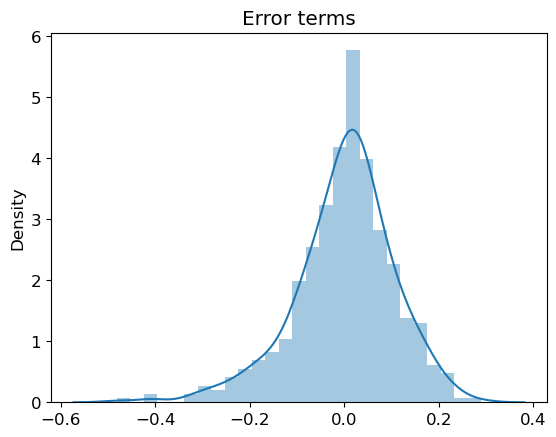

In [81]:
# distrubition plot for residue
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Error terms')
plt.show()

Insights:

The distribution plot of error term shows the normal distribution with mean at Zero.

Text(0, 0.5, 'Residual')

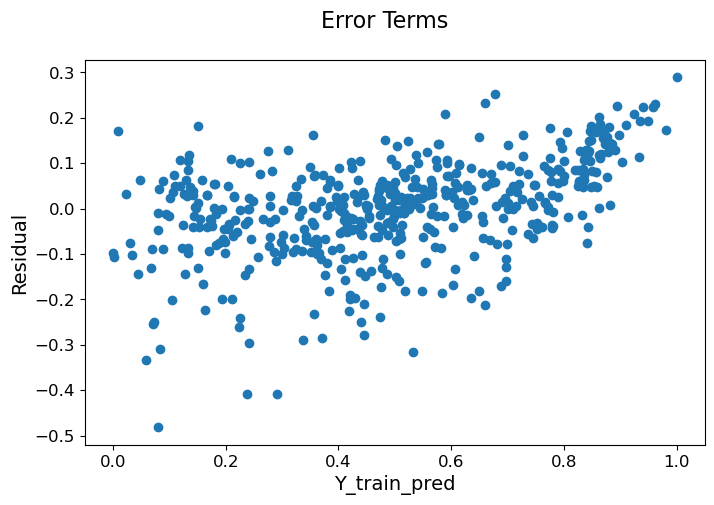

In [83]:
# Error terms train set
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,res)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_train_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)   

Insights:

It seems like the corresponding residual plot is reasonably random.
Also the error terms satisfies to have reasonably constant variance (homoscedasticity)

In [85]:
# check dataframe for the test set
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,weekday_Mon,...,mnth_may,mnth_jun,mnth_jul,mnth_aug,mnth_sep,mnth_oct,mnth_nov,mnth_dec,"weathersit_Mist_Cloudy, Mist_Broken_clouds, Mist_Few_clouds, Mist","weathersit_Light_Snow, Light_Rain_Thunderstorm_Scattered clouds, Light_Rain_Scattered_clouds"
566,1,0,0,0.652175,0.863516,0.393568,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
374,1,0,1,0.276477,0.584521,0.340487,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,0,0,1,0.817910,0.265533,0.165370,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
529,1,0,1,0.720868,0.486457,0.476922,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
233,0,0,1,0.777567,0.359532,0.524373,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [86]:
# select final variables from X_test
X_test_sm = X_test[var_final]
X_test_sm.head()

,yr,holiday,temp,windspeed,season_winter,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_sep,"weathersit_Light_Snow, Light_Rain_Thunderstorm_Scattered clouds, Light_Rain_Scattered_clouds"
566,1,0,0.652175,0.393568,0,0,0,0,0,0,1
374,1,0,0.276477,0.340487,0,0,0,0,0,0,0
181,0,0,0.817910,0.165370,0,0,0,0,0,0,0
529,1,0,0.720868,0.476922,0,0,0,0,1,0,0
233,0,0,0.777567,0.524373,0,0,0,0,0,0,0


In [87]:
# add constant
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,holiday,temp,windspeed,season_winter,mnth_mar,mnth_apr,mnth_may,mnth_jun,mnth_sep,"weathersit_Light_Snow, Light_Rain_Thunderstorm_Scattered clouds, Light_Rain_Scattered_clouds"
566,1.0,1,0,0.652175,0.393568,0,0,0,0,0,0,1
374,1.0,1,0,0.276477,0.340487,0,0,0,0,0,0,0
181,1.0,0,0,0.817910,0.165370,0,0,0,0,0,0,0
529,1.0,1,0,0.720868,0.476922,0,0,0,0,1,0,0
233,1.0,0,0,0.777567,0.524373,0,0,0,0,0,0,0


In [88]:
# predict test dataset
y_test_pred = lm_final.predict(X_test_sm)

4.5 Evaluate the model on test set

In [90]:
# Get R-Squared fro test dataset
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))

R-Squared for Test dataset:  0.789


In [91]:
# Adj. R-Squared for test dataset
N= len(X_test)          # sample size
p =len(var_final)     # Number of independent variable
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.778


In [92]:
# Mean Sqare Error
mse = mean_squared_error(y_test, y_test_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 0.011


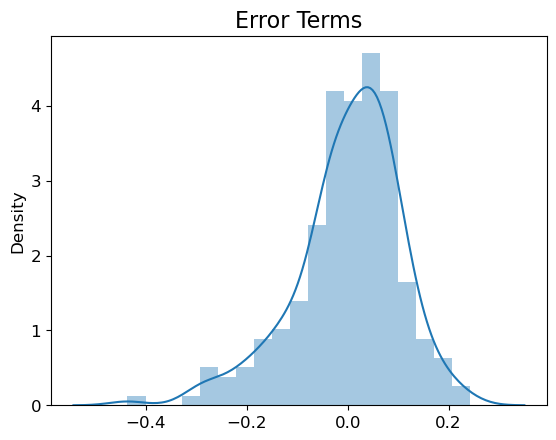

In [93]:
res_test = y_test - y_test_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()

The distribution plot of error term shows the normal distribution with mean at Zero.

Text(0, 0.5, 'Residual')

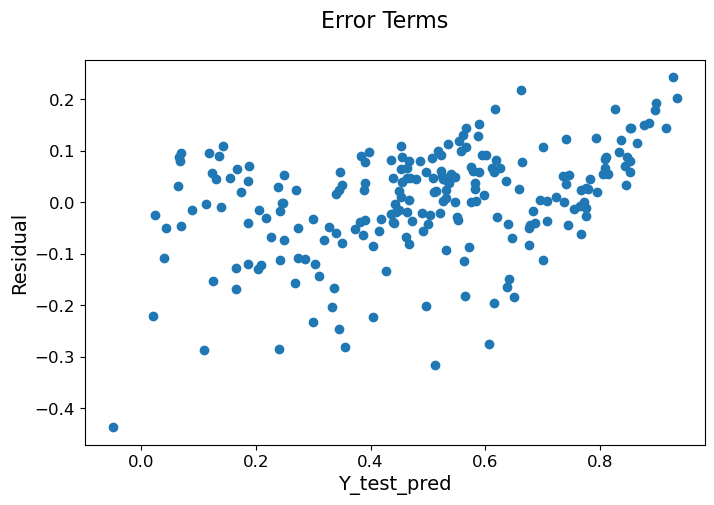

In [95]:
# Error terms
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_test_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)  

It seems like the corresponding residual plot is reasonably random.

Text(0, 0.5, 'y_test_pred')

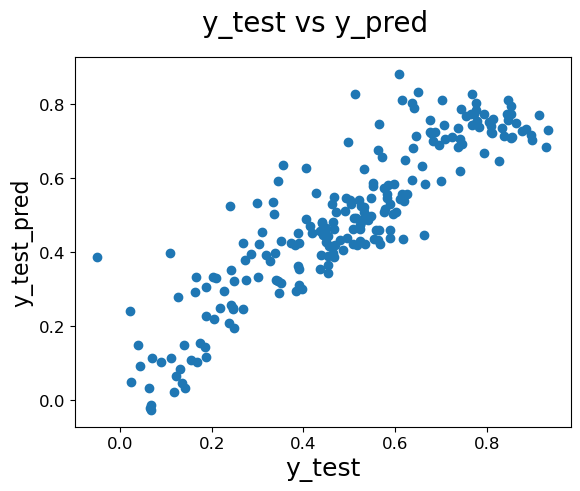

In [97]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)    

Insights:

We can colude that the model lm_5 fit isn't by chance, and has descent predictive power.

## Step-5: Conclusions

In [100]:
# Print R Squared and adj. R Squared
print('R- Sqaured train: ', round(lm_final.rsquared,2), '  Adj. R-Squared train:', round(lm_final.rsquared_adj,3) )
print('R- Sqaured test : ', round(r2_test,2), '  Adj. R-Squared test :', round(r2_test_adj,3))

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

R- Sqaured train:  0.8   Adj. R-Squared train: 0.792
R- Sqaured test :  0.79   Adj. R-Squared test : 0.778

Coefficent for the variables are:
const                                                                                           0.051
yr                                                                                              0.256
holiday                                                                                        -0.088
temp                                                                                            0.581
windspeed                                                                                      -0.139
season_winter                                                                                   0.142
mnth_mar                                                                                        0.070
mnth_apr                                                                                        0.106
mnth_may                                  




The equation of our best fitted line is:

𝑐𝑛𝑡=0.051+(0.256×𝑦𝑟)-(0.088×ℎ𝑜𝑙𝑖𝑑𝑎𝑦)+(0.581×𝑡𝑒𝑚𝑝)−(0.139×𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑)+(0.142×season_winter)+(0.070×mnth_mar)+(0.106* mnth_mar)+ (0.086xmnth_may)+(0.056*mnth_jun)+(0.080xmnth_sep)−(0.226xweathersit_Light_Snow, Light_Rain_Thunderstorm_Scattered clouds, Light_Rain_Scattered_clouds)
 

From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 80% of bike demand.
Coeffiencients of the variables explains the factors effecting the bike demand

Based on final model top three features contributing significantly towards explaining the demand are:

Temperature (0.581)
weathersit_Light_Snow, Light_Rain_Thunderstorm_Scattered clouds, Light_Rain_Scattered_clouds (-0.226)
year (0.256)
So it recomended to give these variables utmost importance while planning to achieve maximum demand.


In [180]:
print(sns.__version__)

0.12.2
